In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [3]:
dataFrame = pd.read_csv("./practice7/NHIS_OPEN_GJ_2016.csv", engine="python")
print(dataFrame.shape)
print(dataFrame.columns)

(1000000, 34)
Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자'],
      dtype='object')


In [5]:
dataFrame[:5]

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2016,1,1,10,27,175.0,75.0,86.0,1.0,1.2,...,45.0,3.0,NaN,0,NaN,NaN,NaN,NaN,NaN,20171219
1,2016,2,2,11,41,160.0,65.0,85.0,1.5,1.2,...,19.0,1.0,NaN,0,NaN,NaN,NaN,NaN,NaN,20171219
2,2016,3,2,11,43,150.0,55.0,80.0,1.5,1.5,...,64.0,1.0,NaN,0,NaN,NaN,NaN,NaN,NaN,20171219
3,2016,4,1,12,48,175.0,70.0,85.0,1.2,1.2,...,69.0,2.0,NaN,1,NaN,NaN,NaN,NaN,1.0,20171219
4,2016,5,2,6,11,160.0,50.0,67.0,0.4,0.5,...,20.0,1.0,NaN,0,NaN,NaN,NaN,NaN,NaN,20171219


In [10]:
## 2. 데이터 샘플링 및 시각화하기
# 특정 열(키, 체중) 선택
twoCols = dataFrame.loc[:, ["신장(5Cm단위)","체중(5Kg단위)"]]

In [11]:
# 키와 몸무게 중에 NaN값이 있는 row 제거
twoCols = twoCols.dropna()

In [12]:
# 샘플링
samples = twoCols.sample(10)
samples

,신장(5Cm단위),체중(5Kg단위)
786354,160.0,50.0
98841,170.0,55.0
556750,170.0,60.0
790241,165.0,70.0
397214,170.0,90.0
347097,155.0,55.0
544825,150.0,60.0
939367,155.0,55.0
926158,170.0,65.0
400062,170.0,80.0


[160.0, 170.0, 170.0, 165.0, 170.0, 155.0, 150.0, 155.0, 170.0, 170.0]
[50.0, 55.0, 60.0, 70.0, 90.0, 55.0, 60.0, 55.0, 65.0, 80.0]


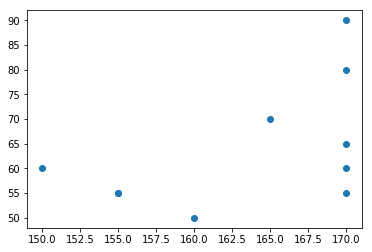

In [13]:
hei = list(samples.iloc[:,0])
print(hei)
wei = list(samples.iloc[:,1])
print(wei)

plt.scatter(hei, wei)
plt.show()

신장(5Cm단위)  체중(5Kg단위)
125.0      40.0           2
130.0      30.0           1
           35.0           1
           45.0           1
           55.0           2
135.0      35.0           2
           40.0           5
           45.0           2
           50.0           3
           55.0           1
           65.0           1
140.0      30.0           2
           35.0           5
           40.0          16
           45.0          21
           50.0          28
           55.0          13
           60.0           7
           65.0           3
           70.0           1
145.0      30.0           3
           35.0           7
           40.0          31
           45.0          78
           50.0         132
           55.0          81
           60.0          41
           65.0          18
           70.0           2
           75.0           2
                       ... 
180.0      65.0          32
           70.0          51
           75.0          75
           80.0          65

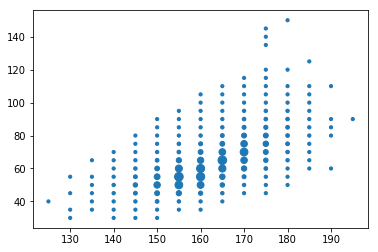

In [14]:
# 시각화 2(개수가 많을수록 원의 반지름 크게)
samples = twoCols.sample(10000)
grouped = samples.groupby(['신장(5Cm단위)', '체중(5Kg단위)']).size() # [신장, 체중] pair별 개수
print(grouped)

plt.scatter(x=grouped.index.get_level_values(0), y=grouped.index.get_level_values(1), s=[10*1.005**n for n in grouped.values])
plt.show()

In [21]:
## 3. 학습 모델 정의하기 X(키) -> Y(체중)
tf.reset_default_graph()
# 데이터 셋이 들어갈 placeholder 정의
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

# 선형회귀 모델 학습에 사용될 변수 정의 (학습되며 값이 바뀜)
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name='W')
b = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name='b')

# 선형회귀 모델(가설) 정의
hypothesis = W*X + b

In [22]:
# 로스함수 정의 (absolute error 사용)
loss = tf.reduce_mean(tf.abs(hypothesis - Y))

# 최적화 방법 정의 (확률적 경사 하강법 사용)
# *** learning rate 조절 ***
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0001)

train_op = optimizer.minimize(loss)

Instructions for updating:
Use tf.cast instead.


In [23]:
# 세션을 생성하고 학습 수행
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습 전 가중치 초기값
print(sess.run([W, b]))

for iteration in range(1001):
    # 전체 데이터에서 10000개씩 sampling하고, list로 변환함
    samples = twoCols.sample(10000)
    sample_x = samples.iloc[:, 0].values #키
    sample_y = samples.iloc[:, 1].values #체중
    
    # sess.run([a,b,c], feed_dict={X:x}) -> 정의된 그래프에서 a,b,c 들이 계산되고, placeholder X 에는 x가 들어감
    _, _loss, predict = sess.run([train_op, loss, hypothesis], feed_dict={X:sample_x, Y:sample_y})
    
#   print(iteration, "(loss):", _loss)

#   50 iteration마다 3개씩 학습 결과 확인
    if iteration % 50 == 0:
        print("=============================iter",str(iteration),"==============================")
        print(sess.run([W,b]))
        print("키", sample_x[:3])
        print("예측 체중", np.round(predict[:3],1))
        print("정답 예측", sample_y[:3])
        print("loss", _loss)


[array([0.88284016], dtype=float32), array([-0.62714887], dtype=float32)]
=============================iter 0 ==============================
[array([0.86661124], dtype=float32), array([-0.6272489], dtype=float32)]
키 [165. 175. 155.]
예측 체중 [145.  153.9 136.2]
정답 예측 [80. 60. 50.]
loss 79.503426
=============================iter 50 ==============================
[array([0.39027262], dtype=float32), array([-0.6302348], dtype=float32)]
키 [160. 170. 160.]
예측 체중 [61.8 65.7 61.8]
정답 예측 [55. 75. 45.]
loss 8.22725
=============================iter 100 ==============================
[array([0.38952002], dtype=float32), array([-0.6303439], dtype=float32)]
키 [165. 175. 180.]
예측 체중 [63.6 67.5 69.5]
정답 예측 [55. 75. 65.]
loss 8.366957
=============================iter 150 ==============================
[array([0.38927844], dtype=float32), array([-0.630449], dtype=float32)]
키 [155. 175. 160.]
예측 체중 [59.7 67.5 61.7]
정답 예측 [65. 70. 55.]
loss 8.117725
=============================iter 200 =================

In [24]:
print(sess.run([W,b]))

height = 170  # 임의의 키 입력
weight = sess.run(hypothesis, feed_dict={X:[height]})
print(weight, "kg")

[array([0.387238], dtype=float32), array([-0.63223225], dtype=float32)]
[65.19823] kg


In [25]:
## 4.X[키, 체중] -> Y[허리둘레]
#데이터에서 특정 열(키, 체중, 허리둘레) 선택

# dataFrame = pd.read_csv("./practice7/NHIS_OPEN_GJ_2016.csv", engine="python")
threeCols = dataFrame.loc[:, ["신장(5Cm단위)", "체중(5Kg단위)", "허리둘레"]]

# 키, 체중, 허리둘레 중에 NaN값이 있는 row 제거
threeCols = threeCols.dropna()

# 체중과 허리둘레의 연관성이 있는지 간단히 확인해보기 위해 평균 값 확인
threeCols.groupby("허리둘레").mean()

,신장(5Cm단위),체중(5Kg단위)
허리둘레,,
2.0,180.000000,115.000000
7.0,165.000000,65.000000
10.0,160.000000,60.000000
30.0,165.000000,65.000000
33.0,167.500000,82.500000
37.0,165.000000,60.000000
41.0,140.000000,25.000000
43.0,145.000000,40.000000
45.0,160.000000,55.000000


In [26]:
# 모델 정의
tf.reset_default_graph()

X1 = tf.placeholder(tf.float32, name='X1') # 키
X2 = tf.placeholder(tf.float32, name='X2') # 체중
Y = tf.placeholder(tf.float32, name='Y')

W1 = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name='W1') # 키를 위한 변수
W2 = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name='W2')
b1 = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name='b1')

# 선형회귀 모델(가설) 정의
hypothesis = W1*X1 + W2*X2 + b1

loss = tf.reduce_mean(tf.abs(hypothesis - Y))

# *** learning rate 조절 ***
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0001)
train_op = optimizer.minimize(loss)

In [28]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for iteration in range(1001):
    # 전체 데이터에서 10000개씩 sampling하고, list로 변환함
    samples = threeCols.sample(10000)
    sample_x1 = samples.iloc[:, 0].values #키
    sample_x2 = samples.iloc[:, 1].values #체중
    sample_y = samples.iloc[:, 2].values # 허리둘레
    
    # sess.run([a,b,c], feed_dict={X:x}) -> 정의된 그래프에서 a,b,c 들이 계산되고, placeholder X 에는 x가 들어감
    _, _loss, predict = sess.run([train_op, loss, hypothesis], feed_dict={X1:sample_x1, X2:sample_x2, Y:sample_y})
    
#   print(iteration, "(loss):", _loss)

#   50 iteration마다 3개씩 학습 결과 확인
    if iteration % 50 == 0:
        print("=============================iter",str(iteration),"==============================")
        print(sess.run([W1, W2, b1]))
        print("키", sample_x1[:3])
        print("체중", sample_x2[:3])
        print("예측 허리둘레", np.round(predict[:3],1))
        print("정답 허리둘레", sample_y[:3])
        print("loss", _loss)

=============================iter 0 ==============================
[array([0.2969523], dtype=float32), array([0.46368748], dtype=float32), array([-0.00370028], dtype=float32)]
키 [160. 150. 175.]
체중 [60. 50. 60.]
예측 허리둘레 [73.8 66.4 78.2]
정답 허리둘레 [88. 86. 75.]
loss 7.0266047
=============================iter 50 ==============================
[array([0.3097528], dtype=float32), array([0.47486988], dtype=float32), array([-0.0035024], dtype=float32)]
키 [165. 160. 170.]
체중 [45. 55. 75.]
예측 허리둘레 [72.5 75.7 88.3]
정답 허리둘레 [63. 68. 92.]
loss 5.8521514
=============================iter 100 ==============================
[array([0.30794182], dtype=float32), array([0.4800545], dtype=float32), array([-0.00339292], dtype=float32)]
키 [165. 185. 155.]
체중 [55. 85. 55.]
예측 허리둘레 [77.2 97.8 74.1]
정답 허리둘레 [76. 82. 72.]
loss 5.9230022
=============================iter 150 ==============================
[array([0.3060376], dtype=float32), array([0.4851072], dtype=float32), array([-0.00328346], dtype=float32)]

In [29]:
print(sess.run([W1, W2, b1]))

height = 165
weight = 55    # 임의의 키와 몸무게 입력
waist = sess.run(hypothesis, feed_dict={X1:[height], X2:[weight]})

print("---허리둘레---")
print(waist, "cm")
print(waist/ 2.54, "인치")

[array([0.28548342], dtype=float32), array([0.53737324], dtype=float32), array([-0.00124092], dtype=float32)]
---허리둘레---
[76.65905] cm
[30.180729] 인치
